In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../KNN_digit recognizer/KNN_train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=df.values
data.shape

(42000, 785)

In [7]:
print(type(data))

<class 'numpy.ndarray'>


In [8]:
x=data[:,1:]
y=data[:,0]

In [9]:
print(x.shape,y.shape)

(42000, 784) (42000,)


In [10]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [12]:
split=int(0.8*x.shape[0])

In [13]:
x_train=x[:split,:]
y_train=y[:split]
x_test=x[split:,:]
y_test=y[split:]

In [14]:
print(x_train.shape,y_train.shape)

(33600, 784) (33600,)


In [15]:
print(x_test.shape,y_test.shape)

(8400, 784) (8400,)


In [44]:
def drawImage(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

In [24]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [25]:
def knn(x,y,querypoint,k=5):
    vals=[]
    for i in range(x.shape[0]):
        d=distance(querypoint,x[i])
        vals.append((d,y[i]))
      
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_values=np.unique(vals[:,1],return_counts=True)
    index=new_values[1].argmax()
    pred=new_values[0][index]
    return pred

In [46]:
pred=knn(x_train,y_train,x_test[7])
pred

7.0

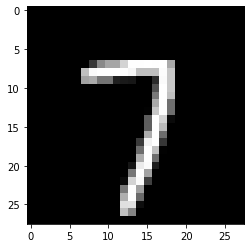

7

In [47]:
drawImage(x_test[7])
y_test[7]

In [48]:
def get_accuracy(y_test,y_pred):
    accuracy=0.0
    accuracy=np.sum(y_pred==y_test)/y_pred.shape[0]
    return accuracy

In [49]:
y_test_list=[]
y_pred_list=[]
for i in range(20):
    index=np.random.randint(0,x_test.shape[0])
    y_pred=knn(x_train,y_train,x_test[index])
    y_test_list.append(y_test[index])
    y_pred_list.append(y_pred)
    
accuracy=get_accuracy(np.array(y_test_list),np.array(y_pred_list))
print("The overall Accuracy : ",accuracy)

The overall Accuracy :  0.95
